In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-71.18228801269501 97.90538025553843
-24.812656387518004 -122.26995761596973
-51.903873505266574 -104.65996504557995
19.952845776469374 11.577659670595494
56.93011793354316 155.75813959795488
-42.019306595247045 -124.70046947793251
33.000907175909134 83.8880292766379
28.51647433928123 -73.09749232014339
14.027680834411555 141.58104720599226
65.95456148067521 -103.03195585719287
69.02444219210926 -74.49596120992072
-5.618270552897798 21.208090375416447
-88.16053903309563 164.83420315295882
11.522874899433745 137.16787457061355
-89.65867450135103 58.150885414218294
23.21833011689762 149.23343925367595
-80.76499457057385 65.56822037192353
-28.626288155014812 -51.774521498573904
-28.077745207875452 71.14708619247841
82.00992191016019 -4.170057620798843
-55.55910037640106 28.425468623954657
82.05040631372316 -157.26854242210644
-4.321044126583672 -28.773100734182236
-80.93001636835326 -53.80576084199933
-1.8331889424006391 76.99573348544709
11.599433403324923 -85.42699979520607
72.162821620

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1e350fe40c563a41f286e243836957ba


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | bilma
Processing Record 5 of Set 1 | sobolevo
Processing Record 6 of Set 1 | jumla
Processing Record 7 of Set 1 | marsh harbour
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | luebo
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | nova prata
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | nisia floresta
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | hithad

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,78.40,70,51,5.44,US,2022-07-20 01:42:44
1,Rikitea,-23.1203,-134.9692,74.17,77,3,8.08,PF,2022-07-20 01:42:44
2,Castro,-24.7911,-50.0119,57.87,95,1,2.80,BR,2022-07-20 01:42:44
3,Bilma,18.6853,12.9164,87.31,18,28,4.09,NE,2022-07-20 01:42:45
4,Sobolevo,54.4299,31.8996,54.54,96,53,9.80,RU,2022-07-20 01:42:45
5,Jumla,29.2747,82.1838,64.44,96,100,2.24,NP,2022-07-20 01:39:04
6,Marsh Harbour,26.5412,-77.0636,81.77,78,2,10.16,BS,2022-07-20 01:42:45
7,Airai,-8.9266,125.4092,69.39,45,72,2.37,TL,2022-07-20 01:42:46
8,La Ronge,55.1001,-105.2842,80.85,29,40,14.97,CA,2022-07-20 01:42:46
9,Clyde River,70.4692,-68.5914,34.03,100,100,6.91,CA,2022-07-20 01:42:46


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

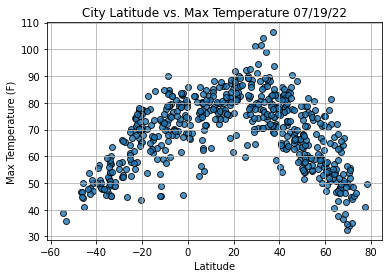

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

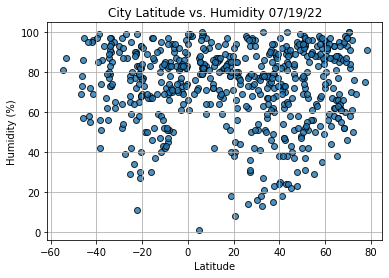

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

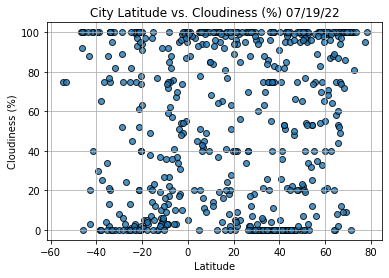

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

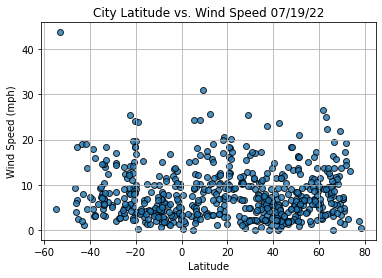

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()